# Analysis and Design of Multi-Layer Neural Networks (MLP)

## Table of Contents
- [MLP Design](#mlp-design)
- [Train Two Different Models](#train-two-different-models)
- [Back Propagation Algorithm](#back-propagation-algorithm)
- [Analysis of Different Hyperparameters](#analysis-of-different-hyperparameters)
- [References](#references)

## MLP Design

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as 



from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist

#### Load and Preprocess Data

In [2]:
# Load Fashion-MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data (0 to 1 range)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 images to 784 vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


#### Build the MLP Model

In [4]:
model = models.Sequential([
    layers.Dense(100, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7410 - loss: 0.7516 - val_accuracy: 0.8419 - val_loss: 0.4653
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8420 - loss: 0.4723 - val_accuracy: 0.8517 - val_loss: 0.4343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8546 - loss: 0.4340 - val_accuracy: 0.8559 - val_loss: 0.4363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.8613 - loss: 0.4245 - val_accuracy: 0.8566 - val_loss: 0.4327
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8643 - loss: 0.4108 - val_accuracy: 0.8667 - val_loss: 0.4083
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.8668 - loss: 0.4105 - val_accuracy: 0.8625 - val_loss: 0.4159
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8668 - loss: 0.4056 - val_accuracy: 0.8657 - val_loss: 0.4126
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8699 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


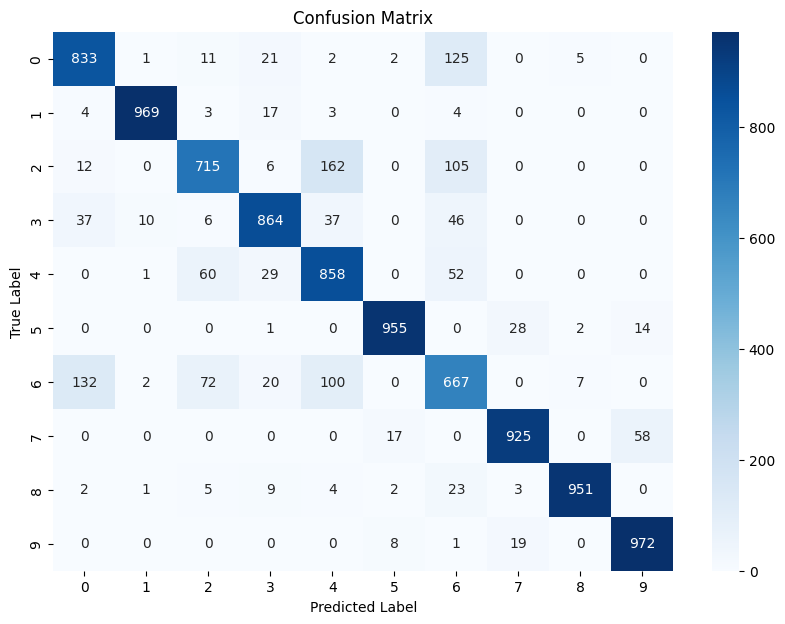

In [7]:
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Identify Confused Classes

In [9]:
most_confused = {}
for i in range(10):
    row = conf_matrix[i]
    row[i] = 0
    most_confused_class = np.argmax(row)
    most_confused[i] = most_confused_class

for m in range(10):
    print(f"Class {m} is most often confused with class {most_confused[m]}")

Class 0 is most often confused with class 6
Class 1 is most often confused with class 3
Class 2 is most often confused with class 4
Class 3 is most often confused with class 6
Class 4 is most often confused with class 2
Class 5 is most often confused with class 7
Class 6 is most often confused with class 0
Class 7 is most often confused with class 9
Class 8 is most often confused with class 6
Class 9 is most often confused with class 7


In [10]:
conf_matrix_copy = conf_matrix.copy()
np.fill_diagonal(conf_matrix_copy, 0)  # Zero the diagonal
most_common_confusion = np.unravel_index(np.argmax(conf_matrix_copy), conf_matrix_copy.shape)
print(f"The two most commonly confused classes are: {most_common_confusion}.")

The two most commonly confused classes are: (2, 4).


#### Impact of Increasing Model Complexity

#### Criteria for Choosing the Best Configuration

- **Validation performance** : Monitor the validation accuracy and loss to ensure the model generalizes well.
- **Training stability** : Ensure that the model does not exhibit overfitting (training accuracy much higher than validation accuracy) or underfitting (both training and validation accuracies are low).
- **Computational efficiency** : Balance model complexity with computational resources (training time, memory usage).
- **Regularization** : Ensure proper regularization (e.g., dropout, L2 regularization) to prevent overfitting.

We can tune hyperparameters such as the number of layers, number of neurons per layer, regularization techniques, and learning rate to find the best configuration.

## Train Two Different Models

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Load and preprocess Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

In [14]:
# First Model: Simple model (no regularization, no dropout)
model1 = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=(28 * 28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
# Second Model: Regularized model (Dropout + L2 regularization)
model2 = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=(28 * 28,)),
    layers.Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

##### Compile both models with SGD first

In [16]:
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### Train both models

In [18]:
history1 = model1.fit(train_images, train_labels, epochs=40, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6890 - loss: 0.9859 - val_accuracy: 0.7998 - val_loss: 0.5762
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8213 - loss: 0.5251 - val_accuracy: 0.8248 - val_loss: 0.5057
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8370 - loss: 0.4758 - val_accuracy: 0.8353 - val_loss: 0.4772
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8447 - loss: 0.4488 - val_accuracy: 0.8376 - val_loss: 0.4650
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8531 - loss: 0.4304 - val_accuracy: 0.8412 - val_loss: 0.4601
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8573 - loss: 0.4136 - val_accuracy: 0.8477 - val_loss: 0.4364
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8609 - loss: 0.4014 - val_accuracy: 0.8508 - val_loss: 0.4250
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8627 - loss: 0.3957 - 

In [19]:
history2 = model2.fit(train_images, train_labels, epochs=40, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5933 - loss: 1.2199 - val_accuracy: 0.7871 - val_loss: 0.6347
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7806 - loss: 0.6558 - val_accuracy: 0.8150 - val_loss: 0.5525
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8065 - loss: 0.5770 - val_accuracy: 0.8240 - val_loss: 0.5152
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8217 - loss: 0.5278 - val_accuracy: 0.8323 - val_loss: 0.4879
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8274 - loss: 0.5110 - val_accuracy: 0.8369 - val_loss: 0.4747
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8339 - loss: 0.4874 - val_accuracy: 0.8397 - val_loss: 0.4611
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8387 - loss: 0.4728 - val_accuracy: 0.8415 - val_loss: 0.4496
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8428 - loss: 0.4617 - 

In [20]:
# Function to plot histograms for weights
def plot_histogram(model, layer_index, layer_name):
    weights, biases = model.layers[layer_index].get_weights()
    plt.hist(weights.flatten(), bins=30)
    plt.title(f'Histogram of {layer_name} Weights')
    plt.show()

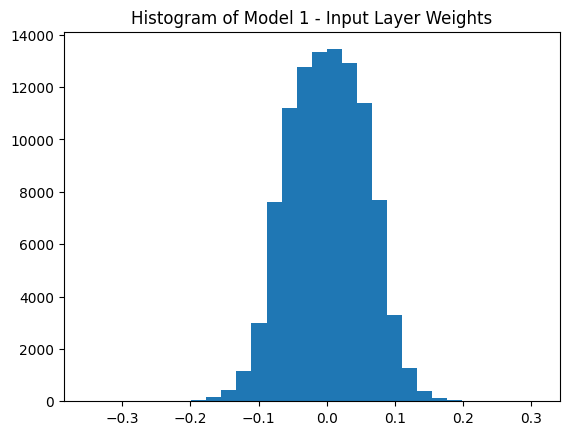

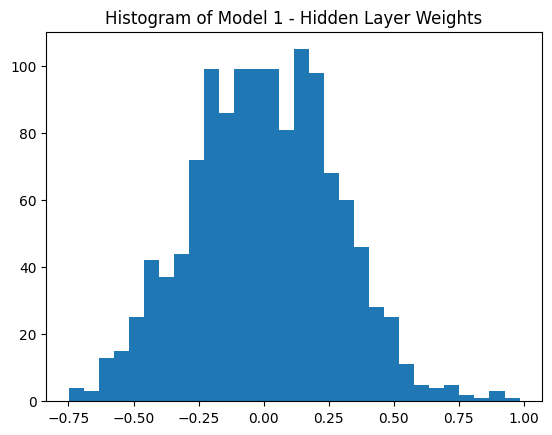

In [21]:
# Generate histograms for input and hidden layers of both models
plot_histogram(model1, 0, 'Model 1 - Input Layer')
plot_histogram(model1, 1, 'Model 1 - Hidden Layer')

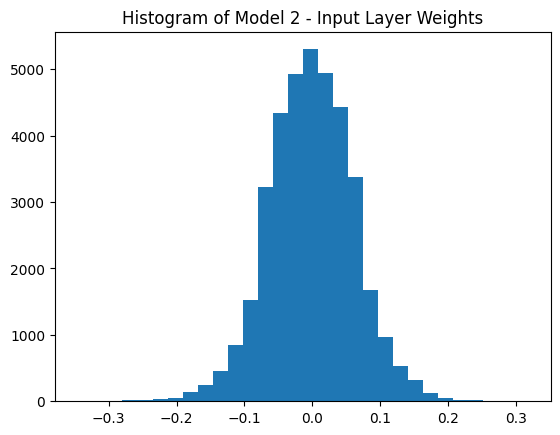

In [22]:
plot_histogram(model2, 0, 'Model 2 - Input Layer')
# plot_histogram(model2, 1, 'Model 2 - Hidden Layer')

In [23]:
# Evaluate models on test data
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

print(f"Model 1 Test Accuracy: {test_acc1}")
print(f"Model 2 Test Accuracy: {test_acc2}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3367
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 0.3777
Model 1 Test Accuracy: 0.8791999816894531
Model 2 Test Accuracy: 0.8697999715805054


## Back Propagation Algorithm

## References

- [Ref1]()
- [Ref2]()
- [Ref3]()